In [74]:
import pickle
X, y = pickle.load(open("dataset.pkl", "rb"))

In [75]:
X.shape

(800, 350, 350)

In [76]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [79]:
X_train_centered = X_train.reshape(-1, 350*350) -X_train.reshape(-1, 350*350).mean(axis =0)
X_test_centered = X_test.reshape(-1, 350*350) -X_test.reshape(-1, 350*350).mean(axis=0)
X_train_centered.shape, X_test_centered.shape

((640, 122500), (160, 122500))

In [80]:
pca = PCA(n_components= 0.99)

In [94]:
X_train_pca = pca.fit_transform(X_train_centered)
X_test_pca = pca.transform(X_test_centered)
X_train_pca.shape, X_test_pca.shape

((640, 402), (160, 402))

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)
y_pred_pca = rfc.predict(X_test_pca)

In [83]:
acc_pca = accuracy_score(y_test, y_pred)
acc_pca

0.71875

In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

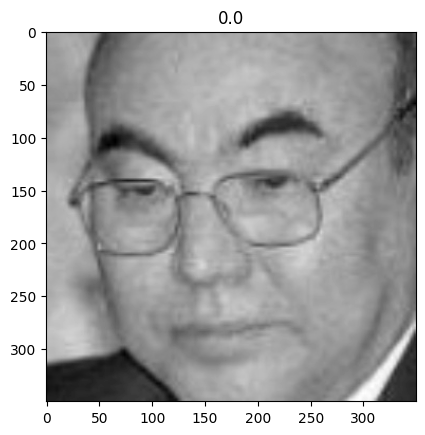

In [104]:
plt.figure()
ind = np.random.randint(len(X_train))
plt.imshow(X_train[ind], cmap = 'gray')
plt.title(y_train[ind])
plt.show()

In [106]:
X_train.shape, X_test.shape

((640, 350, 350, 1), (160, 350, 350, 1))

In [107]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train.shape, X_test.shape

((640, 350, 350, 1), (160, 350, 350, 1))

In [119]:
y_train_matrix = to_categorical(y_train,dtype='float32')
y_test_matrix = to_categorical(y_test, dtype='float32')
y_train_matrix.shape,  y_test_matrix.shape

((640, 2), (160, 2))

In [121]:
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape= (350,350,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters =16, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [123]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
callbacks = [EarlyStopping(monitor = 'val_loss', patience =5)]
history = model.fit(x=X_train, y = y_train_matrix, validation_data = (X_test, y_test_matrix), callbacks = callbacks, epochs =15, batch_size =32 )
history

Epoch 1/15
20/20 [==============================] - 42s 2s/step - loss: 1.0006 - accuracy: 0.5281 - val_loss: 0.6748 - val_accuracy: 0.5000
Epoch 2/15
20/20 [==============================] - 38s 2s/step - loss: 0.5950 - accuracy: 0.7188 - val_loss: 0.5828 - val_accuracy: 0.6812
Epoch 3/15
20/20 [==============================] - 38s 2s/step - loss: 0.3912 - accuracy: 0.8484 - val_loss: 0.3797 - val_accuracy: 0.8250
Epoch 4/15
20/20 [==============================] - 35s 2s/step - loss: 0.1937 - accuracy: 0.9391 - val_loss: 0.1869 - val_accuracy: 0.9187
Epoch 5/15
20/20 [==============================] - 40s 2s/step - loss: 0.1208 - accuracy: 0.9641 - val_loss: 0.2041 - val_accuracy: 0.8938
Epoch 6/15
20/20 [==============================] - 39s 2s/step - loss: 0.0534 - accuracy: 0.9891 - val_loss: 0.1782 - val_accuracy: 0.9125
Epoch 7/15
20/20 [==============================] - 34s 2s/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9250
Epoch 8/15
20/20 [==

In [124]:
loss, accuracy = model.evaluate(X_test, y_test_matrix, verbose =0)
loss, accuracy

(0.1455373615026474, 0.925000011920929)

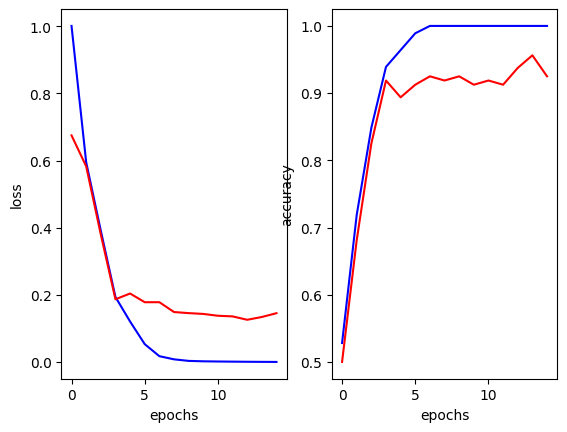

In [125]:
history_list = history.history
loss_fig = history_list['loss']
accuracy_fig =history_list['accuracy']
val_loss_fig =history_list['val_loss']
val_accuracy_fig = history_list['val_accuracy']

plt.figure()
plt.subplot(121)
plt.plot(loss_fig, c = 'blue')
plt.plot(val_loss_fig, c='red')
plt.xlabel('epochs')
plt.ylabel('loss')
#plt.show()

#plt.figure()
plt.subplot(122)
plt.plot(accuracy_fig, c='blue')
plt.plot(val_accuracy_fig, c ='red')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()